1. MSE를 이용한 Linear Regression

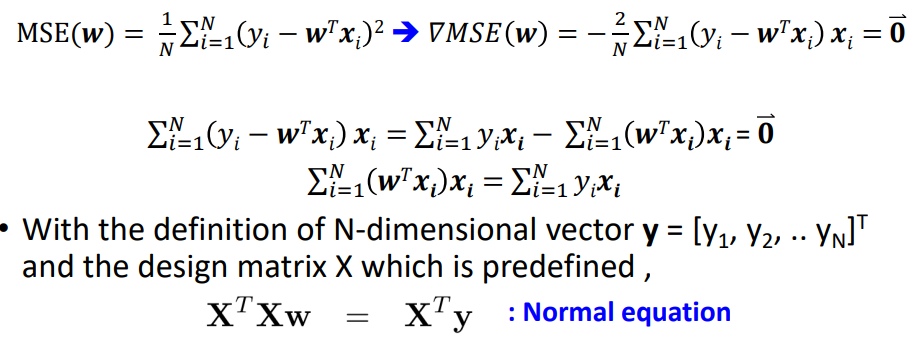

In [95]:
from IPython.display import Image
Image(r"MSE.png")

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [101]:
# y.shape = (n,1), x.shape = (n,a), w.shape = (a,1) #
# n : sample 개수, a : feature 개수 #

data = pd.read_csv(r'LinearRegressionData.csv')
x = np.array(data.iloc[:,:-1])
y = np.array(data.iloc[:,-1]).reshape(-1,1)
x.shape, y.shape

((20, 1), (20, 1))

In [102]:
# Padding
# w.shape (w_0, w_1) = (2,1)
# x.shape = (n,1) -> padding -> (n,2)

In [103]:
# 위의 행렬 수식을 이용하여 w 도출 #
n = len(x)
x_padding = np.c_[np.ones((n,1)),x]
inv_xx = np.linalg.inv(np.dot(x_padding.T, x_padding))
w = np.dot(np.dot(inv_xx, x_padding.T),y)
x_padding

array([[ 1. ,  0.5],
       [ 1. ,  1.2],
       [ 1. ,  1.8],
       [ 1. ,  2.4],
       [ 1. ,  2.6],
       [ 1. ,  3.2],
       [ 1. ,  3.9],
       [ 1. ,  4.4],
       [ 1. ,  4.5],
       [ 1. ,  5. ],
       [ 1. ,  5.3],
       [ 1. ,  5.8],
       [ 1. ,  6. ],
       [ 1. ,  6.1],
       [ 1. ,  6.2],
       [ 1. ,  6.9],
       [ 1. ,  7.2],
       [ 1. ,  8.4],
       [ 1. ,  8.6],
       [ 1. , 10. ]])

In [104]:
y_predict = np.dot(w.T,x_padding.T)
y_predict = y_predict.reshape(-1,1)

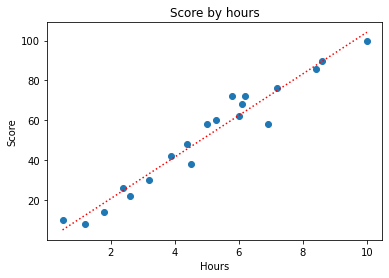

Regression line is -0.2184847028671637+10.443696940573437x


In [105]:
plt.scatter(x,y)
plt.plot(x,y_predict,'r:')
plt.title('Score by hours')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()
print('Regression line is {}+{}x'.format(w[0][0],w[1][0]))

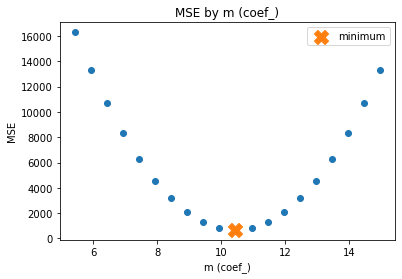

In [109]:
# w에 따른 MSE 그래프 #
n = w[1]
w_test = w.copy()
w_list = np.arange(n-5,n+5,0.5)
lst = []
for i in w_list:
  w_test[1] = i
  # print(w_test)
  error = y - (w_test.T.dot(x_padding.T)).T
  MSE = error.T.dot(error)
  lst.append(MSE)
plt.title('MSE by m (coef_)')
plt.ylabel('MSE')
plt.xlabel('m (coef_)')
plt.scatter(w_list,lst)
plt.scatter(w_list[np.argmin(lst)], min(lst), marker = 'X', s = 200, label = 'minimum')
plt.legend()
plt.show()

2. GDM을 이용한 Linear Regression

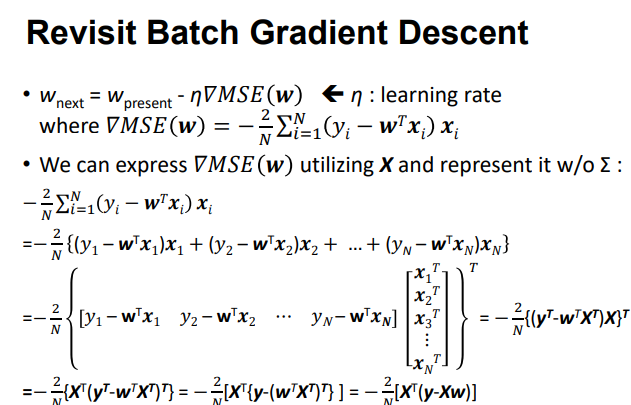

In [111]:
Image('MSE2.png')

In [128]:
# x와 y의 scale이 차이가 날 경우에는 x와 y 모두 standard scale로 바꿔주고 다시 원 데이터로 돌려주는 것이 좋아보임 #
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data_sc = sc.fit_transform(data)
x_sc = np.array(data_sc[:,:-1])
y_sc = np.array(data_sc[:,-1]).reshape(-1,1)
x_sc_padd = np.c_[np.ones((len(x_sc),1)),x_sc]
x_sc_padd.shape,y_sc.shape

((20, 2), (20, 1))

In [125]:
max_iter = 200
eta = 0.05 # Learning rate
wGD = np.ones([2,1]) 
n = len(x)
for i in range(max_iter):
  gradient = - (2/n) * (x_sc_padd.T.dot(y_sc-x_sc_padd.dot(wGD)))
  wGD = wGD - gradient * eta 
wGD

array([[7.05507922e-10],
       [9.76293067e-01]])

In [126]:
y_GD = wGD.T.dot(x_sc_padd.T)
y_GD = y_GD.reshape(-1,1)
y_GD

array([[-1.75831245e+00],
       [-1.48479718e+00],
       [-1.25035552e+00],
       [-1.01591386e+00],
       [-9.37766640e-01],
       [-7.03324980e-01],
       [-4.29809710e-01],
       [-2.34441660e-01],
       [-1.95368049e-01],
       [ 7.05507922e-10],
       [ 1.17220831e-01],
       [ 3.12588881e-01],
       [ 3.90736101e-01],
       [ 4.29809711e-01],
       [ 4.68883321e-01],
       [ 7.42398591e-01],
       [ 8.59619422e-01],
       [ 1.32850274e+00],
       [ 1.40664996e+00],
       [ 1.95368050e+00]])

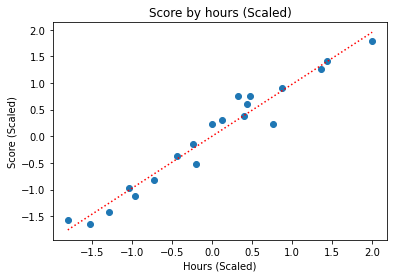

In [127]:
# Standard Scaler
plt.scatter(x_sc,y_sc)
plt.plot(x_sc,y_GD,'r:')
plt.title('Score by hours (Scaled)')
plt.xlabel('Hours (Scaled)')
plt.ylabel('Score (Scaled)')
plt.show()

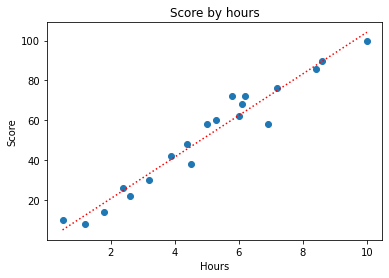

In [144]:
# inverse_transform 은 마지막에 scale한 데이터를 기준으로 바뀜 #
# 따라서 모든 데이터를 묶어서 transform하고 inverse_transform에서 추출하는 게 나음 #

y_org = sc.inverse_transform(np.c_[x_sc, y_GD])[:,-1]
plt.scatter(x,y)
plt.plot(x,y_org,'r:')
plt.title('Score by hours')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

3. MSE를 이용한 Polynomial Regression

In [150]:
poly_data = pd.read_csv(r'PolynomialRegressionData.csv')
x_poly = poly_data.iloc[:,:-1].values
y_poly = poly_data.iloc[:,-1].values
y_poly = y_poly.reshape(-1,1)

(20, 1)

In [151]:
x_square = np.array([i**2 for i in x_poly])
x_poly_padd = np.c_[np.c_[np.ones([len(x_poly),1]),x_poly],x_square]
x_poly_padd

array([[ 1.  ,  0.2 ,  0.04],
       [ 1.  ,  0.5 ,  0.25],
       [ 1.  ,  0.8 ,  0.64],
       [ 1.  ,  0.9 ,  0.81],
       [ 1.  ,  1.2 ,  1.44],
       [ 1.  ,  2.4 ,  5.76],
       [ 1.  ,  2.5 ,  6.25],
       [ 1.  ,  2.6 ,  6.76],
       [ 1.  ,  2.9 ,  8.41],
       [ 1.  ,  3.1 ,  9.61],
       [ 1.  ,  3.2 , 10.24],
       [ 1.  ,  3.3 , 10.89],
       [ 1.  ,  3.7 , 13.69],
       [ 1.  ,  3.9 , 15.21],
       [ 1.  ,  4.  , 16.  ],
       [ 1.  ,  4.1 , 16.81],
       [ 1.  ,  4.2 , 17.64],
       [ 1.  ,  4.4 , 19.36],
       [ 1.  ,  4.7 , 22.09],
       [ 1.  ,  4.8 , 23.04]])

In [152]:
n = len(x_poly)
inv_xx_poly = np.linalg.inv(np.dot(x_poly_padd.T, x_poly_padd))
w_poly = np.dot(np.dot(inv_xx_poly, x_poly_padd.T),y_poly)

In [154]:
# Predict 값 (하지만 visualization을 위해 range 데이터 이용)
# y_predict = np.dot(w_poly.T,x_poly_padd.T)
# y_predict = y_predict.reshape(-1,1)
# x_square = np.array([i**2 for i in x_poly])
# x_poly_padd = np.c_[np.c_[np.ones([len(x_poly),1]),x_poly],x_square]
# x_poly_padd

# 포물선을 smooth하게 하기 위해 0.1 간격 arange padding #

x_range = np.arange(min(x_poly),max(x_poly),0.1)
x_range_padd = np.c_[np.c_[np.ones([len(x_range),1]),x_range],[i**2 for i in x_range]]
y_predict_range = np.dot(w_poly.T,x_range_padd.T)
y_predict_range = y_predict_range.reshape(-1,1)

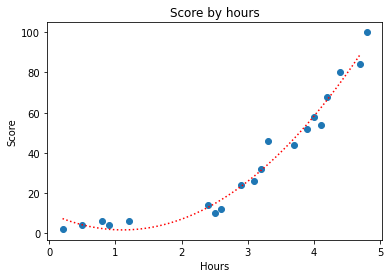

Regression line is 10.059870742609368+-15.064701652435318x+6.780113496621452x**2


In [155]:
plt.scatter(x_poly,y_poly)
plt.plot(x_range,y_predict_range,'r:')
plt.title('Score by hours')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()
print('Regression line is {}+{}x+{}x**2'.format(w_poly[0][0],w_poly[1][0],w_poly[2][0]))

4. GDM을 이용한 Polynomial Regression

In [156]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_poly_sc = sc.fit_transform(x_poly)
y_poly_sc = sc.fit_transform(y_poly)

In [158]:
x_square_sc = np.array([i**2 for i in x_poly_sc])
x_poly_padd_sc = np.c_[np.c_[np.ones([len(x_poly_sc),1]),x_poly_sc],x_square_sc]
x_poly_padd_sc

array([[ 1.00000000e+00, -1.88322595e+00,  3.54653997e+00],
       [ 1.00000000e+00, -1.67162753e+00,  2.79433859e+00],
       [ 1.00000000e+00, -1.46002911e+00,  2.13168499e+00],
       [ 1.00000000e+00, -1.38949630e+00,  1.93069997e+00],
       [ 1.00000000e+00, -1.17789788e+00,  1.38744341e+00],
       [ 1.00000000e+00, -3.31504193e-01,  1.09895030e-01],
       [ 1.00000000e+00, -2.60971386e-01,  6.81060644e-02],
       [ 1.00000000e+00, -1.90438579e-01,  3.62668524e-02],
       [ 1.00000000e+00,  2.11598421e-02,  4.47738918e-04],
       [ 1.00000000e+00,  1.62225456e-01,  2.63170987e-02],
       [ 1.00000000e+00,  2.32758263e-01,  5.41764091e-02],
       [ 1.00000000e+00,  3.03291070e-01,  9.19854734e-02],
       [ 1.00000000e+00,  5.85422299e-01,  3.42719268e-01],
       [ 1.00000000e+00,  7.26487913e-01,  5.27784687e-01],
       [ 1.00000000e+00,  7.97020720e-01,  6.35242028e-01],
       [ 1.00000000e+00,  8.67553527e-01,  7.52649122e-01],
       [ 1.00000000e+00,  9.38086334e-01

In [159]:
max_iter = 200
eta = 0.1 # Learning rate
wGD_poly = np.ones([3,1]) 
n = len(x_poly)
for i in range(max_iter):
  gradient_poly = - (2/n) * (x_poly_padd_sc.T.dot(y_poly_sc-x_poly_padd_sc.dot(wGD_poly)))
  wGD_poly = wGD_poly - gradient_poly * eta 

wGD_poly

array([[-0.45959566],
       [ 1.14046501],
       [ 0.45959789]])

In [160]:
yGD_poly = wGD_poly.T.dot(x_poly_padd_sc.T)
yGD_poly = yGD_poly.reshape(-1,1)
yGD_poly

array([[-0.97736665],
       [-1.08175623],
       [-1.14498983],
       [-1.15692193],
       [-1.1652809 ],
       [-0.78715707],
       [-0.72592299],
       [-0.66011603],
       [-0.43525782],
       [-0.26248792],
       [-0.16924365],
       [-0.07142648],
       [ 0.36557104],
       [ 0.61150711],
       [ 0.74133448],
       [ 0.87573473],
       [ 1.01470786],
       [ 1.3063728 ],
       [ 1.77816684],
       [ 1.94457729]])

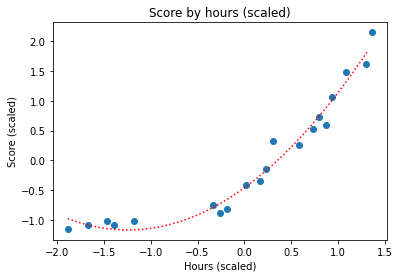

In [161]:
x_range_sc = np.arange(min(x_poly_sc),max(x_poly_sc),0.1)
x_range_sc = x_range_sc.reshape(-1,1)
x_range_padd_sc = np.c_[np.c_[np.ones([len(x_range_sc),1]),x_range_sc], [i**2 for i in x_range_sc]]
y_predict_sc = x_range_padd_sc.dot(wGD_poly)

plt.scatter(x_poly_sc, y_poly_sc)
plt.title('Score by hours (scaled)')
plt.xlabel('Hours (scaled)')
plt.ylabel('Score (scaled)')
plt.plot(x_range_sc,y_predict_sc,'r:')
plt.show()

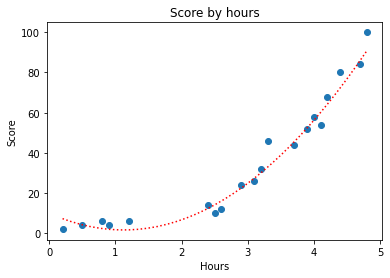

Regression line is -0.45959566355922865+1.140465006703037x+0.45959789467190815x**2


In [162]:
y_org_poly = sc.inverse_transform(y_predict_sc)
x_range_poly = np.linspace(min(x_poly),max(x_poly),33)
plt.scatter(x_poly, y_poly)
plt.plot(x_range_poly, y_org_poly,'r:')
plt.title('Score by hours')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()
print('Regression line is {}+{}x+{}x**2'.format(wGD_poly[0][0],wGD_poly[1][0],wGD_poly[2][0]))